# **Coding Module Assessment on Effects of pm2.5 particles on health**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# Task 1

In [2]:
#read file 1 as a pandas dataframe

pm25 = pd.read_csv("File 1_ AURN_pm25_data.csv")

<ipython-input-2-98aed25b67f4>:3: DtypeWarning: Columns (1,2,4,5,7,8,9,12,14,17,20,21,24,25,26,27,28,29,30,31,32,35,36,38,39,40,41,42,43,45,47,48,49,50,51,52,54,55,57,58,59,61,62,65,66,67,68,70,71,72,73,74,78,79,80,81,82,86,87,89,90,91,92,93,94,95,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  pm25 = pd.read_csv("File 1_ AURN_pm25_data.csv")


In [3]:
#replace 'No data' entries with NaN

pm25.replace('No data', np.nan, inplace=True)

In [4]:
#convert 'DateTime' column to a datetime object

pm25['DateTime'] = pd.to_datetime(pm25['DateTime'])

In [5]:
#list of columns and data types

print(pm25.columns)
print(pm25.dtypes)

Index(['DateTime', 'Aberdeen Erroll Park', 'Auchencorth Moss',
       'Barnstaple A39', 'Belfast Centre', 'Birmingham A4540 Roadside',
       'Birmingham Ladywood', 'Blackpool Marton', 'Borehamwood Meadow Park',
       'Bournemouth',
       ...
       'Warrington', 'Weybourne', 'Wicken Fen', 'Wigan Centre',
       'Wirral Tranmere', 'Worthing A27 Roadside', 'Wrexham', 'Yarner Wood',
       'York Bootham', 'York Fishergate'],
      dtype='object', length=101)
DateTime                 datetime64[ns]
Aberdeen Erroll Park             object
Auchencorth Moss                 object
Barnstaple A39                   object
Belfast Centre                   object
                              ...      
Worthing A27 Roadside            object
Wrexham                          object
Yarner Wood                      object
York Bootham                     object
York Fishergate                  object
Length: 101, dtype: object


# Task 2


In [6]:
#Assigned Reporting Stations - Birmingham Ladywood, London Harlington, Carlisle Morton A595

#convert objects to floats

pm25.iloc[:, 1:101] = pm25.iloc[:, 1:101].astype(float)
print(pm25.dtypes)

#need to have the 'DateTime' column in order

pm25 = pm25.sort_values(by='DateTime')

DateTime                 datetime64[ns]
Aberdeen Erroll Park            float64
Auchencorth Moss                float64
Barnstaple A39                  float64
Belfast Centre                  float64
                              ...      
Worthing A27 Roadside           float64
Wrexham                         float64
Yarner Wood                     float64
York Bootham                    float64
York Fishergate                 float64
Length: 101, dtype: object


<ipython-input-6-01993f1bdea8>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pm25.iloc[:, 1:101] = pm25.iloc[:, 1:101].astype(float)


The 2022 mean value of pm2.5 particles in Birmingham Ladywood is 7.646


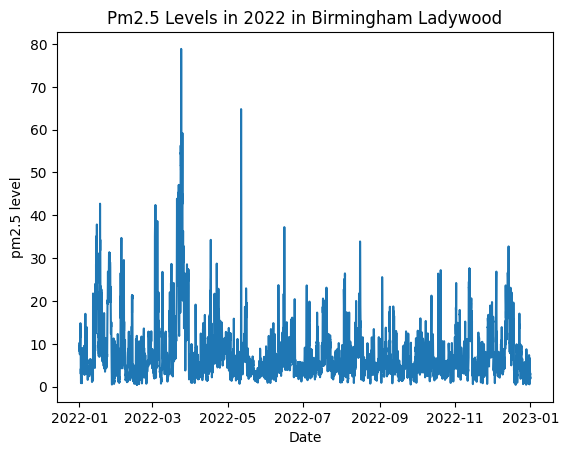

In [7]:
#Birmingham Ladywood:

average = pm25['Birmingham Ladywood'].mean()

print('The 2022 mean value of pm2.5 particles in Birmingham Ladywood is', round(average, 3))

plt.plot(pm25['DateTime'], pm25['Birmingham Ladywood'])
plt.xlabel('Date')
plt.ylabel('pm2.5 level')
plt.title('Pm2.5 Levels in 2022 in Birmingham Ladywood')
plt.show()

The 2022 mean value of pm2.5 particles in London Harlington is 7.904


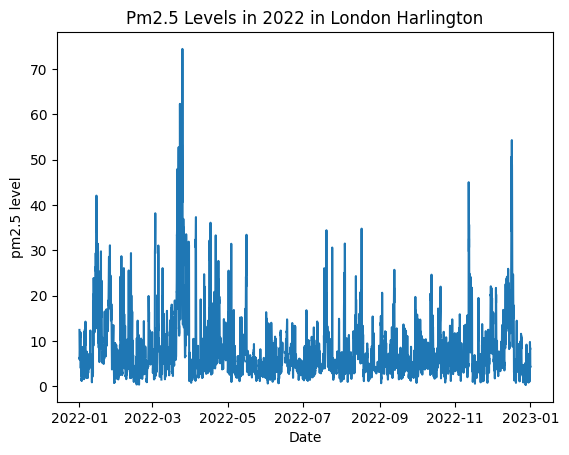

In [8]:
#London Harlington:

average = pm25['London Harlington'].mean()

print('The 2022 mean value of pm2.5 particles in London Harlington is', round(average, 3))

plt.plot(pm25['DateTime'], pm25['London Harlington'])
plt.xlabel('Date')
plt.ylabel('pm2.5 level')
plt.title('Pm2.5 Levels in 2022 in London Harlington')
plt.show()

The 2022 mean value of pm2.5 particles in Carlisle Morton A595 is 9.256


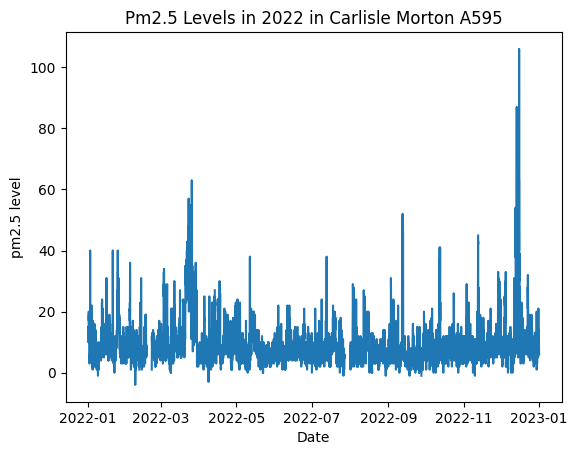

In [9]:
#Carlisle Morton A595:

average = pm25['Carlisle Morton A595'].mean()

print('The 2022 mean value of pm2.5 particles in Carlisle Morton A595 is', round(average, 3))

plt.plot(pm25['DateTime'], pm25['Carlisle Morton A595'])
plt.xlabel('Date')
plt.ylabel('pm2.5 level')
plt.title('Pm2.5 Levels in 2022 in Carlisle Morton A595')
plt.show()

Carlisle Morton A595 has a significantly higher annual mean of pm2.5 particles than London Harlington and Birmingham Ladywood which are very similar with London Harlington having a slightly higher mean. This could be because the Carlisle measurement was taken next to an A road, inevitably having a higher level of pollution. However, London Harlington is directly next to Heathrow Airport which would also be expected to be an area of high pollution.

All of the stations measured a significant increase in pm2.5 levels around March to April. This must be due to anthropogenic influence, as weather trends don't appear to have notable effects throughout the year.

# Task 3

In [10]:
#Add time column to pm25 dataframe

pm25_time = pm25.copy()
pm25_time['time'] = pm25_time['DateTime'].dt.time
print(pm25_time.head())

             DateTime  Aberdeen Erroll Park  Auchencorth Moss  Barnstaple A39  \
0 2022-01-01 00:00:00                11.627             2.995             NaN   
1 2022-01-01 01:00:00                 8.019             1.604             NaN   
2 2022-01-01 02:00:00                 9.033             0.778             NaN   
3 2022-01-01 03:00:00                 7.453             5.024             NaN   
4 2022-01-01 04:00:00                 7.359             6.627             NaN   

   Belfast Centre  Birmingham A4540 Roadside  Birmingham Ladywood  \
0           5.519                     15.778                9.340   
1           8.656                      9.717                8.278   
2          15.873                     10.307                9.363   
3          15.401                     11.415               10.259   
4          16.934                     10.236                9.080   

   Blackpool Marton  Borehamwood Meadow Park  Bournemouth  ...  Weybourne  \
0             8.113  

In [11]:
#create time based data frame

hourly_average = pm25_time.groupby(['time'])[['Birmingham Ladywood', 'London Harlington', 'Carlisle Morton A595']].mean()
hourly_average

,Birmingham Ladywood,London Harlington,Carlisle Morton A595
time,,,
00:00:00,8.167992,8.597342,9.474719
01:00:00,8.097726,8.617240,9.056180
02:00:00,8.050688,8.532540,9.070225
03:00:00,8.063296,8.439540,9.061798
04:00:00,8.053016,8.519590,8.867978
05:00:00,8.108721,8.565168,9.008427
06:00:00,8.241547,8.738433,8.977528
07:00:00,8.311813,8.728289,9.101124
08:00:00,8.277204,8.717911,9.182336


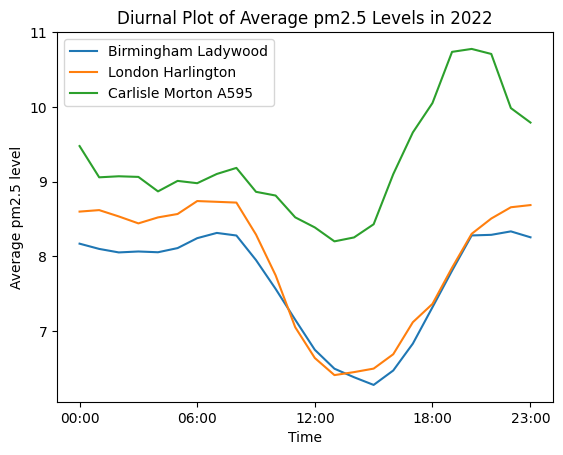

In [12]:
#plot graph

hourly_average.plot()
plt.xlabel('Time')
plt.ylabel('Average pm2.5 level')
plt.title('Diurnal Plot of Average pm2.5 Levels in 2022')
plt.xticks(['00:00' , '06:00', '12:00', '18:00', '23:00'])
plt.show()

The graph above shows a clear relationship between time of day and levels of pm2.5 particles. The general trend is that levels are constant during the evening, night and morning, and then start to decrease at around sunrise, becoming the lowest when the sun is highest around midday, and then increase again as the sun goes down. This could imply that pm2.5 particles are photolysed by solar radiation, however more investigation would be necessary to confirm this.

Additionally, London Harlington and Birmingham Ladywood have much more similar values and shapes to their graphs, whereas levels in Carlisle don't reduce as much at midday and also increase to a maximum at around 8pm. A major source of pm2.5 particles come from combustion of fuels, so this meximum could be related to the significant impact that rush hour has on this specifc station, being next to an A road.

# Task 4

In [13]:
#import file 3 as a geopandas dataframe and file 4 as a dataframe

model = pd.read_csv('File 4_ pm25_MSOA.csv')
areas = gpd.read_file('File 3_ MSOA_Boundaries.geojson')
print(model.columns)
print(areas.columns)

Index(['MSOA11CD', 'pm25_2007', 'pm25_2008', 'pm25_2009', 'pm25_2010',
       'pm25_2011', 'pm25_2012', 'pm25_2013', 'pm25_2014', 'pm25_2015',
       'pm25_2016', 'pm25_2017', 'pm25_2018', 'pm25_2019', 'pm25_2020',
       'pm25_2021', 'pm25_2022'],
      dtype='object')
Index(['OBJECTID', 'MSOA11CD', 'MSOA11NM', 'MSOA11NMW', 'BNG_E', 'BNG_N',
       'LONG', 'LAT', 'GlobalID', 'geometry'],
      dtype='object')


In [14]:
modelmap = areas.merge(model, how='left', left_on=areas['MSOA11CD'], right_on=model['MSOA11CD'])

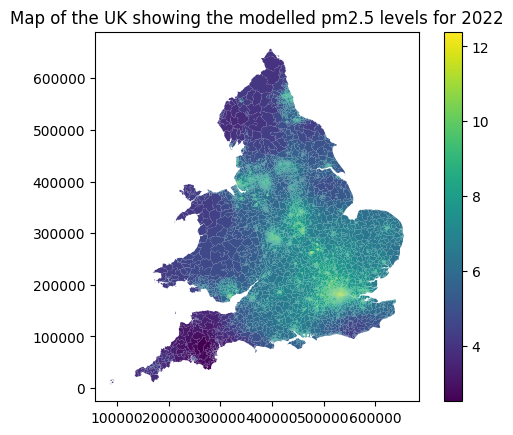

In [15]:
modelmap.plot(column = 'pm25_2022', legend = True)
plt.title('Map of the UK showing the modelled pm2.5 levels for 2022')
plt.show()

This map shows the model's prediction of pm2.5 levels. The model predicts the highest levels of pm2.5 particles around major cities with London having the most concentrated pollution. The areas around Manchester, Leeds and Newcastle are highlighted, as well as some areas in the Midlands which are hubs of industry so would be expected to have higher levels of pollution.

# Task 5

In [16]:
#import file 2 as a geopandas

msoaloc = gpd.read_file('File 2_ AURN_locations.geojson')
print(msoaloc.columns)
print(model.columns)

Index(['UK-AIR ID', 'EU Site ID', 'EMEP Site ID', 'Site Name',
       'Environment Type', 'Zone', 'Start Date', 'End Date', 'Altitude (m)',
       'Networks', 'AURN Pollutants Measured', 'Site Description', 'MSOA11CD',
       'MSOA11NM', 'geometry'],
      dtype='object')
Index(['MSOA11CD', 'pm25_2007', 'pm25_2008', 'pm25_2009', 'pm25_2010',
       'pm25_2011', 'pm25_2012', 'pm25_2013', 'pm25_2014', 'pm25_2015',
       'pm25_2016', 'pm25_2017', 'pm25_2018', 'pm25_2019', 'pm25_2020',
       'pm25_2021', 'pm25_2022'],
      dtype='object')


In [17]:
#merge msoa locations with modelled pm2.5 levels

modelmsoa = msoaloc.merge(model, how = 'left', left_on = msoaloc['MSOA11CD'], right_on = model['MSOA11CD'])
print(modelmsoa.columns)

Index(['key_0', 'UK-AIR ID', 'EU Site ID', 'EMEP Site ID', 'Site Name',
       'Environment Type', 'Zone', 'Start Date', 'End Date', 'Altitude (m)',
       'Networks', 'AURN Pollutants Measured', 'Site Description',
       'MSOA11CD_x', 'MSOA11NM', 'geometry', 'MSOA11CD_y', 'pm25_2007',
       'pm25_2008', 'pm25_2009', 'pm25_2010', 'pm25_2011', 'pm25_2012',
       'pm25_2013', 'pm25_2014', 'pm25_2015', 'pm25_2016', 'pm25_2017',
       'pm25_2018', 'pm25_2019', 'pm25_2020', 'pm25_2021', 'pm25_2022'],
      dtype='object')


In [18]:
#set 'Site Name' as index

modelmsoa.set_index('Site Name', inplace = True)

In [19]:
#print the annual average pm2.5 particles in Birmingham Ladywood

average = modelmsoa.loc['Birmingham Ladywood', 'pm25_2022']

print('The predicted average level of pm2.5 particles in Birmingham Ladywood in 2022 was', round(average, 3))

The predicted average level of pm2.5 particles in Birmingham Ladywood in 2022 was 8.877


In [20]:
#print the annual average pm2.5 particles in London Harlington

average = modelmsoa.loc['London Harlington', 'pm25_2022']

print('The predicted average level of pm2.5 particles in London Harlington in 2022 was', round(average, 3))

The predicted average level of pm2.5 particles in London Harlington in 2022 was 9.281


In [21]:
#print the annual average pm2.5 particles in Carlisle Morton A595

average = modelmsoa.loc['Carlisle Morton A595', 'pm25_2022']

print('The predicted average level of pm2.5 particles in Carlisle Morton A595 in 2022 was', round(average, 3))

The predicted average level of pm2.5 particles in Carlisle Morton A595 in 2022 was 7.09


The model predicts a higher output of pm2.5 particles in Birmingham Ladywood and London Harlington than were observed in 2022. However, the levels of pm2.5 particles recorded in 2022 in Carlisle Morton are higher than the modelled output. This could indicate that awareness of the effects of pollution has caused actions to be taken to reduce emissions in these areas. Some examples of these actions would not be applicable to somewhere next to an A road which may explain why Carlisle has a higher measurement than was predicted.

# Task 6

In [22]:
#add 'change' column (data from 2022 taken away from data from 2017 to get positive values)

modelmsoa['change'] = modelmsoa['pm25_2022']-modelmsoa['pm25_2017']
print(modelmsoa.head(3))

                               key_0 UK-AIR ID EU Site ID EMEP Site ID  \
Site Name                                                                
Barnsley Gawber            E02001520  UKA00353    GB0681A         None   
Barnstaple A39             E02004184  UKA00574    GB1029A         None   
Birmingham A4540 Roadside  E02006900  UKA00626    GB1067A         None   

                           Environment Type                      Zone  \
Site Name                                                               
Barnsley Gawber            Urban Background    Yorkshire & Humberside   
Barnstaple A39                Urban Traffic                South West   
Birmingham A4540 Roadside     Urban Traffic  West Midlands Urban Area   

                           Start Date End Date  Altitude (m)  \
Site Name                                                      
Barnsley Gawber            1997-07-07     None         100.0   
Barnstaple A39             2013-11-14     None          13.0   
Birming

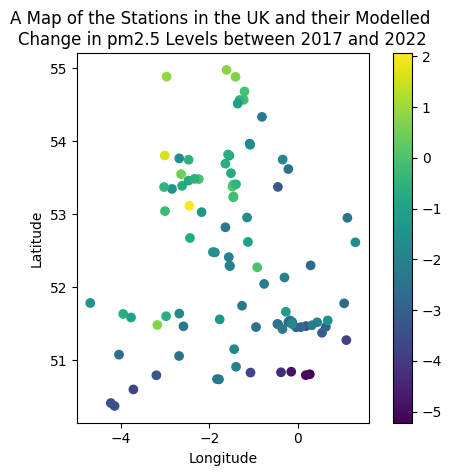

In [23]:
#plot change on a map

modelmsoa.plot(column = 'change', legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('A Map of the Stations in the UK and their Modelled \nChange in pm2.5 Levels between 2017 and 2022')
plt.show()

This map shows the change that the model predicted in pm2.5 levels from 2017 to 2022. It predicts some places to have a significant decrease and some places a small increase. It tends to be places in the south that are predicted a large decrease in pm2.5 levels, and the more northern the location, the more likely the place is to have an increase in pm2.5 levels. This could be due to the majority of large industrial plants being located in the midlands and the north of England, increasing general pollution there.

# Task 7

In [24]:
#greatest decrease in pm2.5 values:

modelmsoa_sorted = modelmsoa.sort_values(by = 'change')
print(modelmsoa_sorted.head(1))

                key_0 UK-AIR ID EU Site ID EMEP Site ID  Environment Type  \
Site Name                                                                   
Eastbourne  E02004357  UKA00546    GB1005A         None  Urban Background   

                  Zone  Start Date End Date  Altitude (m)  \
Site Name                                                   
Eastbourne  South East  2009-07-01     None           7.0   

                                                     Networks  ... pm25_2014  \
Site Name                                                      ...             
Eastbourne  Automatic Urban and Rural Monitoring Network (...  ...   10.2074   

           pm25_2015 pm25_2016 pm25_2017 pm25_2018 pm25_2019  pm25_2020  \
Site Name                                                                 
Eastbourne  9.915658  11.37221  10.88186  10.67473  9.693258   8.016346   

            pm25_2021  pm25_2022    change  
Site Name                                   
Eastbourne   6.805278   5.6

As seen above, Eastbourne was predicted to have the greatest decrease in pm2.5 between 2017 and 2022. This may be due to it having such a high level of pm2.5 particles previously, being ranked the 3rd worst place in the UK for pm2.5 particles by WHO in 2016 (1). Since pm2.5 particles are quite long lived in the atmosphere, Eastbourne's proximity to London and also the English Channel, one of the most densely populated areas in Europe, means that there my be lots of pm2.5 particles that travelled there rather than produced there. These particles have been linked to heath issues so places with significant concentrations of pm2.5 particles would be more focussed on reducing this than places where it wasn't as high to begin with. This could explain why Eastbourne has the greatest decrease.   

# Task 8

In [25]:
#import pm25 and health

health = pd.read_csv('File 5_ MSOA_HealthAndPop_Data.csv')

In [26]:
#get mean pm25 of each area

print(pm25.mean())

Aberdeen Erroll Park         5.952639
Auchencorth Moss             3.847238
Barnstaple A39               7.893763
Belfast Centre               7.902910
Birmingham A4540 Roadside    8.693177
                               ...   
Worthing A27 Roadside        8.524015
Wrexham                      7.128374
Yarner Wood                  5.031259
York Bootham                 8.217920
York Fishergate              8.777688
Length: 100, dtype: float64


<ipython-input-26-dc31cfb93b93>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(pm25.mean())


In [27]:
#switching the rows and columns to be able to merge data

pm251 = pm25.T

# remove the data and time column and add mean of each row as a column

pm251 = pm251.drop('DateTime')
pm251['mean'] = pm251.mean(axis = 1)

#change the site name to be a column rather than the index

pm252 = pm251.reset_index()
print(pm252.head())

                       index       0      1       2       3       4       5  \
0       Aberdeen Erroll Park  11.627  8.019   9.033   7.453   7.359   8.373   
1           Auchencorth Moss   2.995  1.604   0.778   5.024   6.627   7.217   
2             Barnstaple A39     NaN    NaN     NaN     NaN     NaN     NaN   
3             Belfast Centre   5.519  8.656  15.873  15.401  16.934  18.396   
4  Birmingham A4540 Roadside  15.778  9.717  10.307  11.415  10.236   9.859   

        6       7       8  ...    8751    8752   8753    8754    8755   8756  \
0   11.25  11.816  12.759  ...  13.043  23.302  8.113  10.778  13.774  6.792   
1   7.736   9.245   9.434  ...   3.042   2.948  2.193   1.792   2.052  1.958   
2     NaN     NaN     NaN  ...     1.0     3.0    4.0     5.0     5.0    7.0   
3  17.712  12.995  10.991  ...   7.759   3.868  6.179     5.0   4.316  4.552   
4   9.623   8.797   8.255  ...   6.085   6.887  3.892   3.538   3.278  3.325   

    8757   8758   8759      mean  
0  5.684 

In [28]:
#create a new data frame with only key data for final plot

av2022 = pm252[['index', 'mean']]
print(av2022.head())

                       index      mean
0       Aberdeen Erroll Park  5.952639
1           Auchencorth Moss  3.847238
2             Barnstaple A39  7.893763
3             Belfast Centre  7.902910
4  Birmingham A4540 Roadside  8.693177


In [29]:
#make a data frame of area and associated msoa11cd code

areamsoa = msoaloc[['Site Name', 'MSOA11CD']]
areamsoa = areamsoa.sort_values(by='Site Name')
print(areamsoa.head())

                   Site Name   MSOA11CD
0            Barnsley Gawber  E02001520
1             Barnstaple A39  E02004184
2  Birmingham A4540 Roadside  E02006900
3        Birmingham Ladywood  E02006898
4      Blackburn Audley Park  E02002621


In [30]:
#make a data frame of msoa11cd code and CHD percentage

chdcode = health[['msoa11cd', 'CHD_Perc']]
print(chdcode.head())

    msoa11cd  CHD_Perc
0  E02000416   1.64083
1  E02000417   1.58105
2  E02000418   1.61092
3  E02000419   1.65734
4  E02000420   1.50557


In [31]:
#merge dataframes to get one with site name and chd percentage

chdarea = chdcode.merge(areamsoa, how='outer', left_on = chdcode['msoa11cd'], right_on=areamsoa['MSOA11CD'])
chdarea = chdarea.sort_values(by='Site Name')

#create a new dataframe with only key data for final plot

chdplace = chdarea[['Site Name', 'CHD_Perc']]
print(chdplace.head())

                      Site Name  CHD_Perc
1213            Barnsley Gawber   4.23034
4134             Barnstaple A39   4.39689
6758  Birmingham A4540 Roadside   2.42933
6756        Birmingham Ladywood   2.35268
2946      Blackburn Audley Park   3.60358


In [32]:
#merge dataframes to get one with the percentage of CHD and pm2.5 levels

chdpm25 = chdplace.merge(av2022, how='inner', left_on = chdplace['Site Name'], right_on = av2022['index'])

#create a new data frame with 2 key columns, sorted by the x axis - mean

final = chdpm25[['mean', 'CHD_Perc']]
final = final.sort_values(by='mean')
print(final.head())

        mean  CHD_Perc
80  3.841217   4.48139
26  4.151479   4.66560
86  5.031259   3.75726
13  5.760625   3.46950
81  5.897683   2.83960


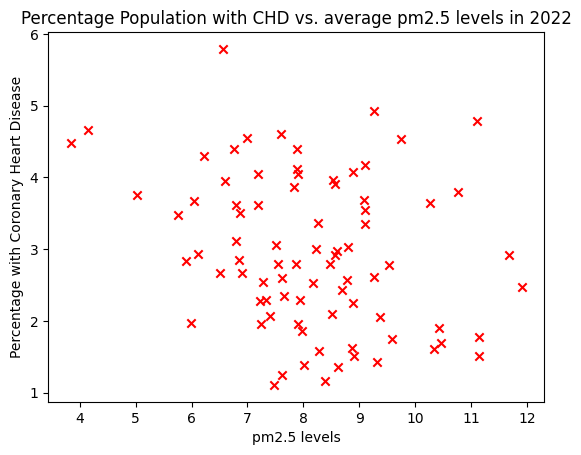

In [33]:
#plot CHD percentage against mean pm2.5 levels

plt.scatter(final['mean'], final['CHD_Perc'], marker = 'x', color = 'r')
plt.xlabel('pm2.5 levels')
plt.ylabel('Percentage with Coronary Heart Disease')
plt.title('Percentage Population with CHD vs. average pm2.5 levels in 2022')
plt.show()

This plot doesn't show a direct correlation between pm2.5 levels in 2022 and percentage population with CHD.

However, this doesn't mean that the issues are unrelated. Coronary heart disease can be caused by lots of different things including genetics. This plot would be more useful if there was some data on the number of people with new coronary heart disease diagnoses. Additionally, these are the average pm2.5 particle levels in 2022 and there is no indication of when the health data was collected so they cannot be compared this directly.

It would be useful to know how long it would theoretically take for pm2.5 levels to cause coronary heart disease and how long to get diagnosed. This information would allow the pm2.5 data from the right time to be plotted against new coronary heart disease diagnoses. This data would give a much better indication of whether there was a true correlation between pm2.5 levels and coronary heart disease.

# References

(1) Vaughan, A. Eastbourne a surprise name among UK's most polluted towns and cities. *The Guardian.* [Online]. 12 May, 2016. [15 December, 2023]. Available from: https://www.theguardian.com/environment/2016/may/12/eastbourne-a-surprise-name-among-uks-most-polluted-towns-and-cities

